
انواع روش های نایو بیز را نام برده و فرمول اصلی ریاضیاتی نایو بیز را بنویسید

1- Gaussian Naive Bayes
2- Multinomial Naive Bayes
3-Complement Naive Bayes
4-Bernoulli Naive Bayes
5-Categorical Naive Bayes
6-Out-of-core naive Bayes model fitting

را توضیح دهید svm naivebase knn  اساس کار و روش انجام مدل های

naive bayes: 
براساس احتمال پیشین کار می کند
svm:
mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable
knn:
finding the distances between a query and all the examples in the data

در مدل ها چه راهکاری را پیشنهاد میدهید TP TN FP FNبرای پیدا کردن     

ازمون های recall, precision, false positive rate

روی داده های گل زنبق تمام روش هایی را که اموخته اید امتحان کنید

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
iris_df["class"] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


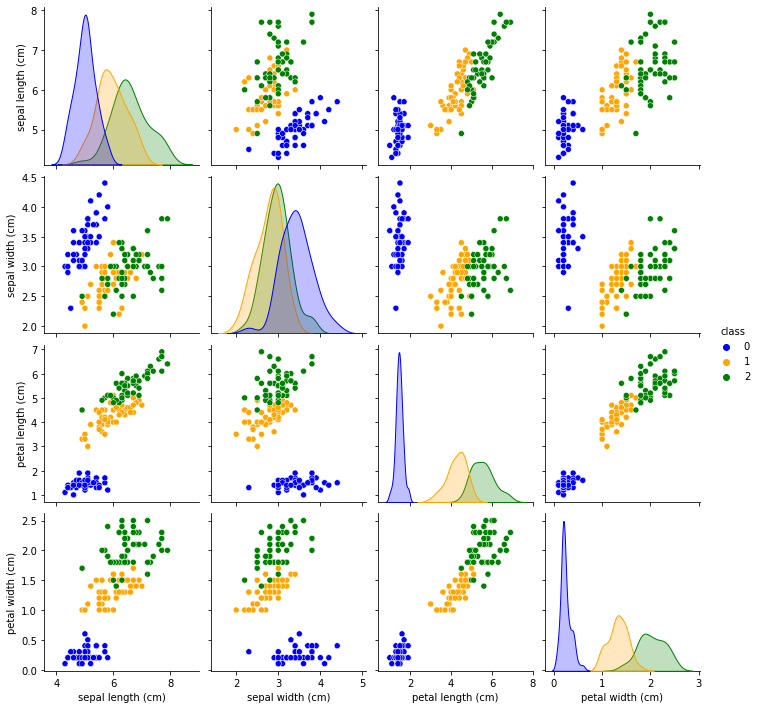

In [3]:
sns.pairplot(iris_df, hue="class",palette=['blue','orange','green'])

In [4]:
from sklearn.model_selection import train_test_split
def split(data,test_size,stratify,size):
    X_trian,X_test,Y_tran,Y_test=train_test_split(data[0],data[1],stratify=stratify,test_size=size)
    return X_trian,X_test,Y_tran,Y_test

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
def scaler (X_train,obj,x_test):
    obj=StandardScaler()
    obj.fit_transform(X_train)
    obj.transform(x_test)



In [7]:
from sklearn.metrics import classification_report
def report(y_test,predict):

   result= classification_report(y_test, predict)
   return result

In [82]:
from sklearn.metrics import confusion_matrix
def matrix(y_test,y_predict):
    result= confusion_matrix(y_test,y_predict)
    print(result)

In [77]:
X=iris_df.iloc[:,:-1]
Y=iris_df.iloc[:,-1]

X_train,X_test,Y_tran,Y_test=split([X,Y],0.15,None,42)
scaler(X_train,'iris',X_test)


In [ ]:
from sklearn.linear_model import SGDClassifier

In [66]:

clf=SGDClassifier(alpha=0.01,loss='perceptron')
ypredict=clf.fit(X_train,Y_tran).predict(X_test)

In [67]:
balanced_accuracy_score(Y_test,ypredict)

1.0

In [68]:
matrix(Y_test,ypredict)

[[16  0  0]
 [ 0 16  0]
 [ 0  0 10]]


In [70]:
from sklearn.linear_model import Perceptron
per=Perceptron(alpha=0.00011,penalty='l2')
ypredict=per.fit(X_train,Y_tran).predict(X_test)

In [74]:
balanced_accuracy_score(Y_test,ypredict)

0.6666666666666666

In [84]:
matri=matrix(Y_test,ypredict)

[[11  0  3]
 [12  0  4]
 [ 8  0  4]]


In [85]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
ypredict=kn.fit(X_train,Y_tran).predict(X_test)


In [86]:
balanced_accuracy_score(Y_test,ypredict)

0.9236111111111112

In [87]:
matrix(Y_test,ypredict)

[[14  0  0]
 [ 0 15  1]
 [ 0  2 10]]


بالایی دارند را پاک کرده و دوباره مدلی که این کار روی آن تاثیر گذار است را امتحان کنید corrolationحال ستونی که 

In [88]:
iris_df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [96]:
newdf=iris_df.drop(columns='petal length (cm)')
x=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1]

In [97]:
X_train,X_test,Y_tran,Y_test=split([x,y],0.15,None,42)
scaler(X_train,'iris1',X_test)

In [98]:
clf=SGDClassifier(alpha=0.01,loss='perceptron')
ypredict=clf.fit(X_train,Y_tran).predict(X_test)
balanced_accuracy_score(Y_test,ypredict)

0.9196969696969698

نتیجه بدتر شد

### try svm on below dataset and get accuracy more than 95 

In [13]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [14]:
X=pd.DataFrame(data=wine.data,columns=wine.feature_names)
Y=wine.target

In [15]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [16]:
X_train,X_test,Y_tran,Y_test=split([X,Y],0.15,None,42)

In [17]:
scaler(X_train,'svm',X_test)

In [18]:
from sklearn.svm import SVC

In [99]:
clf=SVC(C=21,kernel='poly',degree=13,coef0=0.9)
clf.fit(X_train,Y_tran)
Y_predict=clf.predict(X_test)

In [100]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_predict)

0.9227272727272728

In [101]:
matrix(Y_test, Y_predict)

[[11  0  0]
 [ 0  9  2]
 [ 0  1 19]]
